In [1]:
import os
import math
from dotenv import load_dotenv

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

os.chdir("..")
os.makedirs("docs/media", exist_ok=True)

load_dotenv("globs.env")
tickers   = os.getenv("TICKERS").split(",")
media_dir = os.getenv("MEDIA_DIR")
data_dir  = os.getenv("DATA_DIR")

### Part A

In [2]:
prices_df = (
    pd.read_csv("data_/prices.csv")
    .assign(date=lambda x: pd.to_datetime(x["date"]).dt.date)
    .pipe(lambda df: df.set_axis(
        ["date"] + [c.split("_")[0] for c in df.columns[1:]], axis=1
    ))
)
prices_df

,date,AAPL,MSFT,GOOGL,AMZN,META,NVDA,JPM,BAC,XOM,CVX,JNJ,PFE,WMT,PG,KO
0,2021-01-04,129.41,217.69,86.3065,159.3315,268.94,13.1135,125.87,30.03,41.50,84.71,156.50,36.81,48.8433,137.82,52.76
1,2021-01-05,131.01,217.90,87.0025,160.9255,270.97,13.4048,125.65,30.26,43.50,87.00,158.34,37.19,48.5833,138.70,52.18
2,2021-01-06,126.60,212.25,86.1440,156.9190,263.31,12.6145,131.55,32.15,44.61,89.80,159.83,36.87,48.8867,140.16,50.52
3,2021-01-07,130.92,218.29,88.7170,158.1080,268.74,13.3440,135.87,32.86,44.96,90.22,160.37,37.06,48.8833,138.85,49.96
4,2021-01-08,132.05,219.62,89.8915,159.1350,267.57,13.2768,136.02,32.53,45.46,91.08,160.04,37.13,48.8767,138.79,51.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,2025-11-07,268.47,496.82,278.8300,244.4100,621.71,188.1500,314.21,53.20,117.22,155.02,186.57,24.43,102.5900,146.98,70.55
1219,2025-11-10,269.43,506.00,290.1000,248.4000,631.76,199.0500,316.89,53.42,118.22,155.65,188.41,24.39,102.4200,145.50,70.52
1220,2025-11-11,275.25,508.68,291.3100,249.1000,627.08,193.1600,315.62,53.63,119.78,156.24,193.83,25.51,103.4400,148.54,71.61
1221,2025-11-12,273.47,511.14,286.7100,244.2000,609.01,193.8000,320.41,54.11,118.12,153.32,194.39,25.87,103.4400,148.01,71.51


In [3]:
returns_df = (
    prices_df
    .set_index("date")
    .transform(lambda x: np.log(x/x.shift(1)))
    .dropna(how="all")
)

returns_df

,AAPL,MSFT,GOOGL,AMZN,META,NVDA,JPM,BAC,XOM,CVX,JNJ,PFE,WMT,PG,KO
date,,,,,,,,,,,,,,,
2021-01-05,0.012288,0.000964,0.008032,0.009955,0.007520,0.021971,-0.001749,0.007630,0.047068,0.026674,0.011689,0.010270,-0.005337,0.006365,-0.011054
2021-01-06,-0.034241,-0.026271,-0.009917,-0.025212,-0.028676,-0.060766,0.045887,0.060586,0.025197,0.031677,0.009366,-0.008642,0.006226,0.010471,-0.032330
2021-01-07,0.033554,0.028060,0.029431,0.007549,0.020412,0.056220,0.032312,0.021844,0.007815,0.004666,0.003373,0.005140,-0.000070,-0.009390,-0.011147
2021-01-08,0.008594,0.006074,0.013152,0.006475,-0.004363,-0.005049,0.001103,-0.010093,0.011060,0.009487,-0.002060,0.001887,-0.000135,-0.000432,0.022170
2021-01-11,-0.023523,-0.009746,-0.023377,-0.021754,-0.040928,0.025631,0.014814,0.016464,0.029905,0.005693,-0.004195,0.017090,0.004491,-0.006796,-0.017378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-07,-0.004831,-0.000563,-0.021009,0.005621,0.004465,0.000372,0.002517,-0.001690,0.023478,0.013508,-0.002142,-0.017046,0.008910,0.005800,0.021346
2025-11-10,0.003569,0.018309,0.039623,0.016193,0.016036,0.056317,0.008493,0.004127,0.008495,0.004056,0.009814,-0.001639,-0.001658,-0.010120,-0.000425
2025-11-11,0.021371,0.005282,0.004162,0.002814,-0.007435,-0.030037,-0.004016,0.003923,0.013109,0.003783,0.028361,0.044897,0.009910,0.020678,0.015338


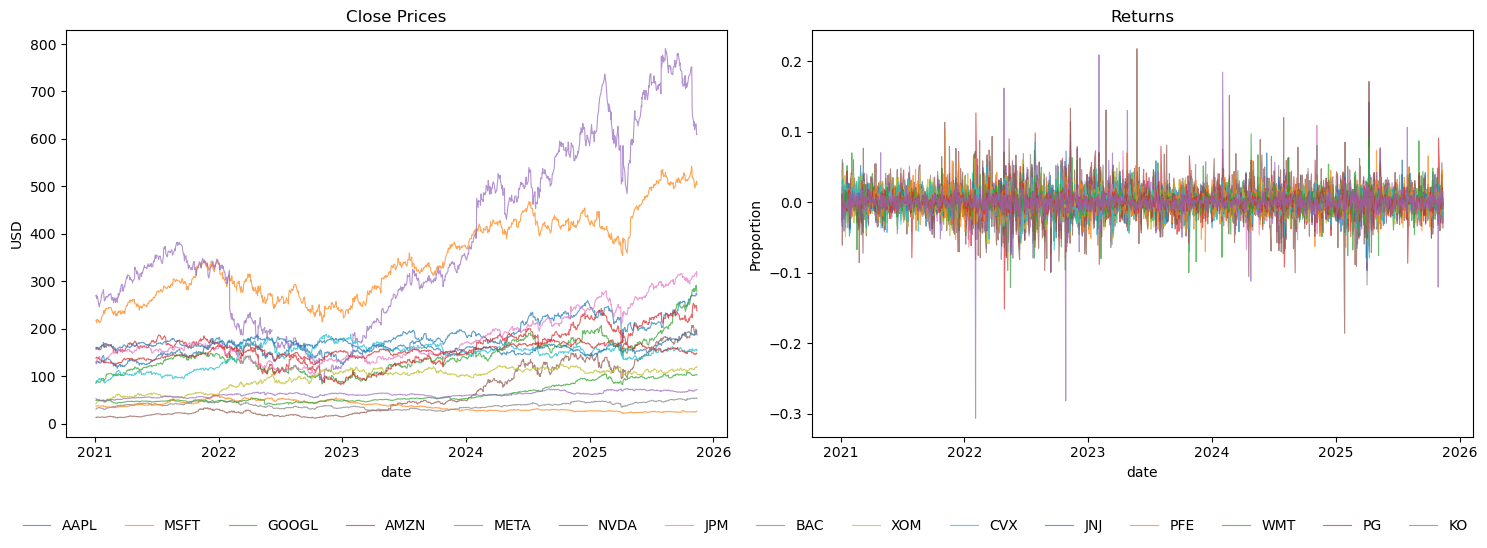

In [4]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

p = prices_df.set_index("date").plot(ax=axes[0], legend=False, alpha=0.7,linewidth=0.8)
axes[0].set_title("Close Prices")
axes[0].set_ylabel("USD")

returns_df.plot(ax=axes[1], legend=False, alpha=0.7, linewidth=0.8)
axes[1].set_title("Returns")
axes[1].set_ylabel("Proportion")

handles, labels = p.get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(0.5, -0.10), ncol=15, frameon=False)

plt.tight_layout()
plt.savefig(media_dir + "/close_rets.png")
plt.show()

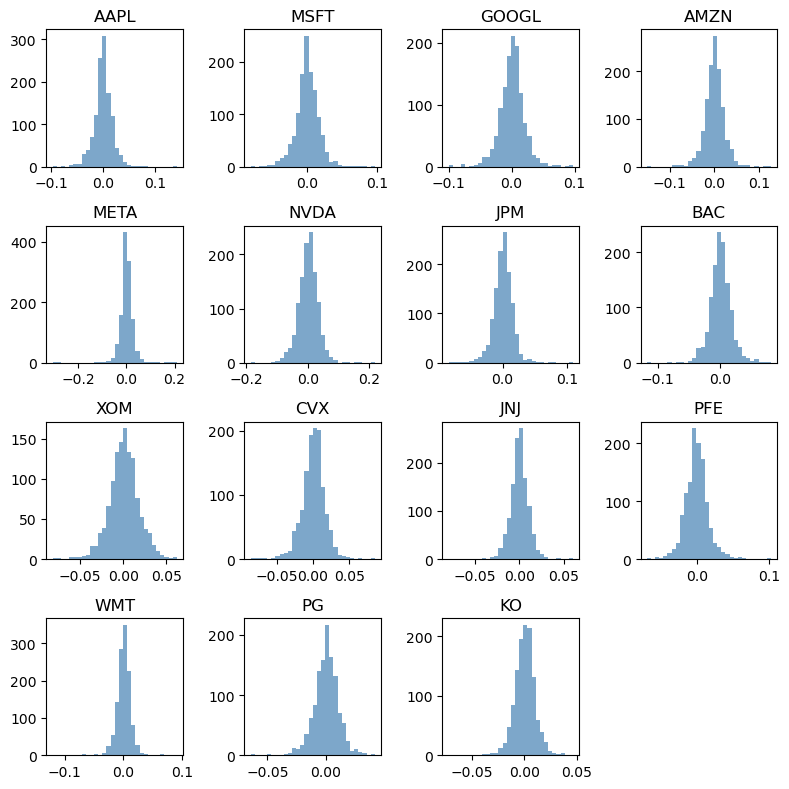

In [5]:
tickers = returns_df.columns
N = len(tickers)
n = math.ceil(math.sqrt(N))

fig, axes = plt.subplots(n, n, figsize=(2*n, 2*n))

k = 0
for i in range(n):
    for j in range(n):
        ax = axes[i, j]
        if k < N:
            t = tickers[k]
            ax.hist(returns_df[t], bins=30, alpha=0.7, color="steelblue")
            ax.set_title(t)
        else:
            ax.axis("off")
        k += 1

plt.tight_layout()
plt.savefig(media_dir + "/returns_pdf.png")
plt.show()

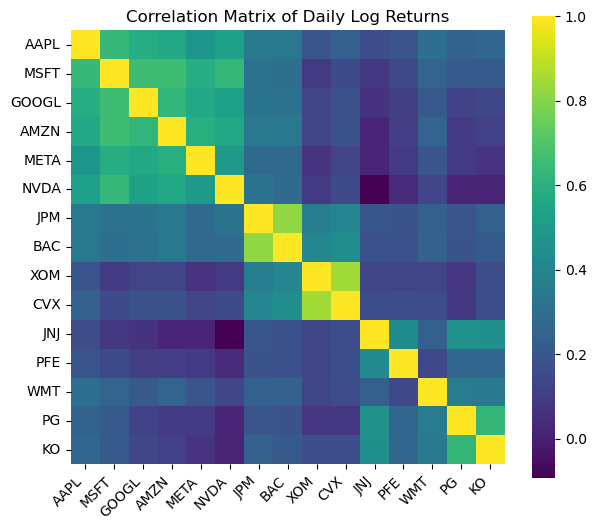

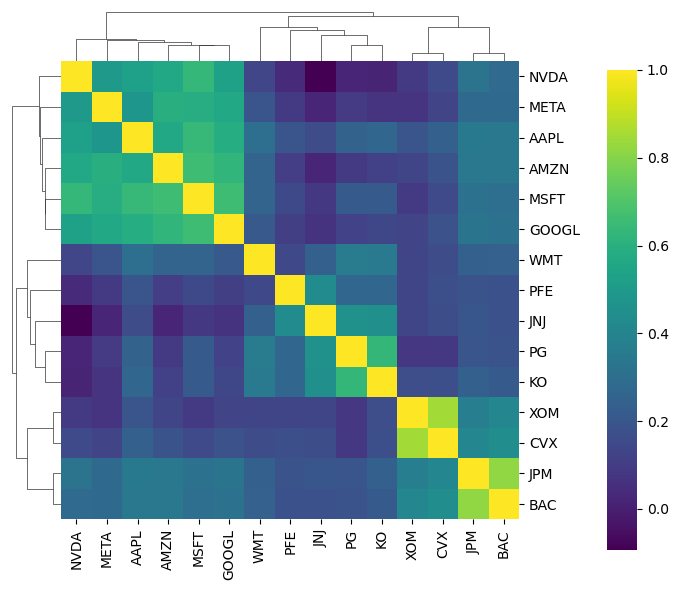

In [6]:
## Correlation Matrix

corr = returns_df.corr()
plt.figure(figsize=(7, 6))
sns.heatmap(
    corr, 
    cmap='viridis', 
    square=True,
    annot=False, 
    xticklabels=True, 
    yticklabels=True
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Matrix of Daily Log Returns")
plt.savefig(media_dir + "/rets_corr_matrix.png")
plt.show()

## Hierachial clustering
sns.clustermap(
    returns_df.corr(),
    cmap="viridis",
    figsize=(6,6),
    dendrogram_ratio=(0.1, 0.1),
    cbar_pos=(1.02, 0.075, 0.05, 0.8)
)
plt.savefig(media_dir + "/hierarchial_cluster_corr.png")
plt.show()

In [7]:
returns_df.to_csv(data_dir + "/returns.csv")